Wszystkie testy dla liczby 16 bitowej sie powiodly
Dla liczby 16bitowej 10 testow trwalo srednio 0.0090285062789917 s

Wszystkie testy dla liczby 17 bitowej sie powiodly
Dla liczby 17bitowej 10 testow trwalo srednio 0.018820858001708983 s

Wszystkie testy dla liczby 18 bitowej sie powiodly
Dla liczby 18bitowej 10 testow trwalo srednio 0.0302703857421875 s

Wszystkie testy dla liczby 19 bitowej sie powiodly
Dla liczby 19bitowej 10 testow trwalo srednio 0.051007533073425294 s

Wszystkie testy dla liczby 20 bitowej sie powiodly
Dla liczby 20bitowej 10 testow trwalo srednio 0.06103436946868897 s

Wszystkie testy dla liczby 21 bitowej sie powiodly
Dla liczby 21bitowej 10 testow trwalo srednio 0.16996383666992188 s

Wszystkie testy dla liczby 22 bitowej sie powiodly
Dla liczby 22bitowej 10 testow trwalo srednio 0.21496567726135254 s

Wszystkie testy dla liczby 23 bitowej sie powiodly
Dla liczby 23bitowej 10 testow trwalo srednio 0.41054067611694334 s

Wszystkie testy dla liczby 24 bitowej si

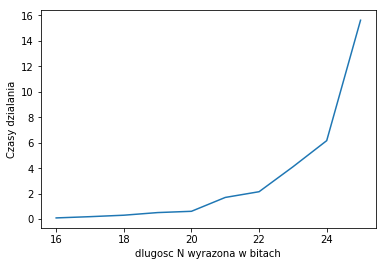

In [8]:
import random 
from time import time
import matplotlib.pyplot as plt

def shanks(g, h, p):
    m =  ceil(sqrt(p-1))
    
    L = dict([(i, pow(g, i, p)) for i in range(0, m)])
    l = {k: v for k, v in sorted(L.items(), key=lambda item: item[1])} #posortowany slownik
    
    gmInv = pow(g, -m, p)
    j = 0
    
    while True:
        target = h * power_mod(gmInv, j, p)
        for i in l:
            if l[i] == target:
                return ((j*m) + i) % p
        j +=1
    
def test_shanks(N):
    p = next_prime(N)
    F = GF(p)
    g = F.multiplicative_generator()
    
    x = F.random_element()
    h = g ** x
    
    solved = shanks(g, h, p)
    if solved == x:
        return 1
    else:
        return 0

def analyse_shanks():
    x = [i for i in range(16, 26)]
    times = []
    for i in x:
        result = 0
        start = time()
        for j in range(0, 10):
            result += test_shanks(2^i)
        if result == 10:
            print("Wszystkie testy dla liczby "+str(i)+" bitowej sie powiodly")
        end = time()
        times += [end - start]
        print("Dla liczby "+ str(i) + "bitowej 10 testow trwalo srednio " + str((end - start)/10) +" s")
        print()
    plt.plot(x, times)
    plt.xlabel("dlugosc N wyrazona w bitach")
    plt.ylabel("Czasy dzialania")
    plt.show()

def next_xab(x, a, b, g, h, p):
    if x%3 == 0:
        x = power_mod(x,2,p)
        a = (2 * a) % (p - 1)
        b = (2 * b) % (p - 1)
    elif x%3 == 1:
        x = (x * g) % p
        a = (a + 1) % (p - 1)
    else:
        x = (x * h) % p
        b = (b + 1) % (p - 1)
    return x, a, b
    
def Rho(g, h, p):
    
    x = 1
    a = 0
    b = 0
    i = 1
    
    while True:
        
        X = x
        A,B = a,b
        
        while i < p-1:
            x, a, b = next_xab(x, a, b, g, h, p)
            X, A, B = next_xab(X, A, B, g, h, p)
            X, A, B = next_xab(X, A, B, g, h, p)
            
            if x == X:
                r = (b - B) % (p - 1)
                u = (A - a) 
                d = gcd(r, p - 1)   
                
                if d == 1:
                    e = xgcd(r, p - 1)[1]
                    x = (u * e) % (p - 1)
                    return x
                
                elif d >= 2:
                    s = xgcd(r, p - 1)[1]
                    w = (u * s) % (p - 1)
                    
                    for k in range(0, d):
                        x = ((w / d) + (k * ((p - 1) / d)))
                        
                        if pow(int(g), int(x), int(p)) == h:
                            return x

        i += 1
#         a += random.randint(1, p - 1)
#         b += random.randint(1, p - 1)
        a += 1
        b += 1
        x = pow(g, a, p) * pow(h, b, p)
        X = x
        A, B = a, b

def test_Rho(N):
    p = next_prime(N)
    F = GF(p)
    g = F.multiplicative_generator()
    
    x = F.random_element()
    h = g ** x
    
    solved = Rho(int(g), int(h), int(p))
    if solved == x:
        return 1
    else:
        return 0
        
def analyse_Rho():
    x = [i for i in range(17, 40)]
    times = []
    for i in x:
        result = 0
        start = time()
        for j in range(0, 10):
            result += test_Rho(2^i)
        if result == 10:
            print("Wszystkie testy dla liczby "+str(i)+" bitowej sie powiodly")
        end = time()
        times += [end - start]
        print("Dla liczby "+ str(i) + "bitowej 10 testow trwalo srednio " + str((end - start)/10) +" s")
        print()
    plt.plot(x, times)
    plt.xlabel("dlugosc N wyrazona w bitach")
    plt.ylabel("Czasy dzialania")
    plt.show()
    

    
g = 11
h = 23
p = 71

# g = 5
# h = 2
# p = 1019

# shanks(g,h,p)
# test_shanks(17)
analyse_shanks()
# Rho(g, h, p)
# shanks(g, h, p)
# analyse_Rho()
# Rho(2, 41, 211)

Wszystkie testy dla liczby 16 bitowej sie powiodly
Dla liczby 16bitowej 10 testow trwalo:0.15243124961853027

Wszystkie testy dla liczby 17 bitowej sie powiodly
Dla liczby 17bitowej 10 testow trwalo:0.21648597717285156

Wszystkie testy dla liczby 18 bitowej sie powiodly
Dla liczby 18bitowej 10 testow trwalo:0.27798962593078613

Wszystkie testy dla liczby 19 bitowej sie powiodly
Dla liczby 19bitowej 10 testow trwalo:0.5352609157562256

Wszystkie testy dla liczby 20 bitowej sie powiodly
Dla liczby 20bitowej 10 testow trwalo:0.732060432434082

Wszystkie testy dla liczby 21 bitowej sie powiodly
Dla liczby 21bitowej 10 testow trwalo:1.2822983264923096

Wszystkie testy dla liczby 22 bitowej sie powiodly
Dla liczby 22bitowej 10 testow trwalo:2.369551420211792

Wszystkie testy dla liczby 23 bitowej sie powiodly
Dla liczby 23bitowej 10 testow trwalo:4.024893045425415

Wszystkie testy dla liczby 24 bitowej sie powiodly
Dla liczby 24bitowej 10 testow trwalo:5.743915319442749

Wszystkie testy dla 

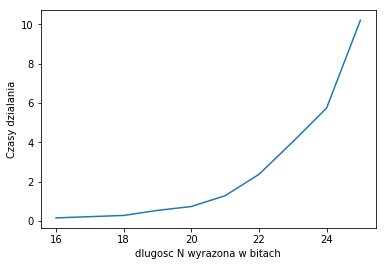

In [41]:
analyse_shanks()

In [44]:
(12-57)%70

25

In [27]:
pollard(5,22,53)

-7 5


26

In [ ]:
len(bin(next_prime(2^16)))



In [36]:
pow(11,37,71)

21